# Intro

## Step0: Load Data

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

#Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) =mnist.load_data()

# Normalize the images to the range [0, 1]
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
# Convert the labels to one-hot encoded vectors
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Step1: Define the Model

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten


The below is not used in PI.1. Only here in PI.2.

In [3]:
from tensorflow.keras import models, layers

In [4]:
# Define a simple sequential model
simple_sequential_model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dense(10, activation='softmax')
])
# Use this sequential model in a functional model
inputs = Input(shape=(28, 28, 1))
x = Flatten()(inputs)
x = simple_sequential_model(x)
outputs = x
# Create the model
model_with_sequential = Model(inputs=inputs, outputs=outputs)
# Display the model's architecture
model_with_sequential.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 sequential (Sequential)     (None, 10)                50890     
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Step2: Train the Model

In [5]:
model = model_with_sequential
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',
metrics=['accuracy'])
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10


750/750 [==============================] - 4s 4ms/step - loss: 0.3869 - accuracy: 0.8932 - val_loss: 0.2118 - val_accuracy: 0.9400
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1874 - accuracy: 0.9453 - val_loss: 0.1564 - val_accuracy: 0.9563
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1362 - accuracy: 0.9602 - val_loss: 0.1343 - val_accuracy: 0.9613
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1086 - accuracy: 0.9687 - val_loss: 0.1181 - val_accuracy: 0.9663
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0895 - accuracy: 0.9743 - val_loss: 0.1106 - val_accuracy: 0.9676
Epoch 6/10
750/750 [==============================] - 2s 3ms/step - loss: 0.0761 - accuracy: 0.9782 - val_loss: 0.1003 - val_accuracy: 0.9703
Epoch 7/10
750/750 [==============================] - 3s 3ms/step - loss: 0.0658 - accuracy: 0.9809 - val_loss: 0.1005 - val_accuracy: 0.9696
Epo

#### Step3: Model Evaluation

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"Test Accuracy: {test_acc:.3f}")
print(f"Test Loss: {test_loss:.3f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0837 - accuracy: 0.9752
Test Accuracy: 0.975
Test Loss: 0.084


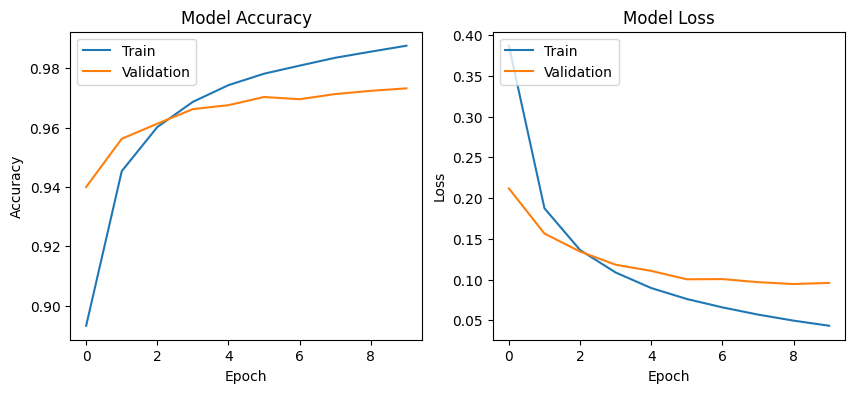

In [7]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [8]:
print(history)